In [67]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [87]:
# pip install category_encoders

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [256]:
df = pd.read_excel(r'deals.xlsx')

In [257]:
df.head()

DEAL ID  PORTFOLIO COMPANY ID          PORTFOLIO COMPANY  \
0  V241641                422955         Siren Marine, Inc.   
1  V241792                232453  Fortem Technologies, Inc.   
2  V241341                421074         Junify Corporation   
3  V241508                396814              Allonnia, LLC   
4  V241648                186582        Vyopta Incorporated   

  PORTFOLIO COMPANY COUNTRY  DEAL DATE DEAL STATUS                     STAGE  \
0                        US 2021-03-22   Completed         Unspecified Round   
1                        US 2021-03-22   Completed         Unspecified Round   
2                        US 2021-03-17   Completed                      Seed   
3                        US 2021-03-17   Completed         Unspecified Round   
4                        US 2021-03-16   Completed  Growth Capital/Expansion   

                          INVESTORS / BUYERS (FIRMS)        PRIMARY INDUSTRY  \
0  Yamaha Motor Ventures & Laboratory Silicon Valley  Ship Building & Repair   
1  Toshiba Infrastructure Systems & Solutions Cor...                Software   
2                                  Infinity Ventures                Software   
3                                   Evok Innovations       Power & Utilities   
4                           Vistara Capital Partners                Software   

  DEAL CURRENCY  ...  BOARD REPRESENTATIVES  \
0           NaN  ...                    NaN   
1           USD  ...                    NaN   
2           JPY  ...                    NaN   
3           USD  ...                    NaN   
4           USD  ...                    NaN   

                                  INDUSTRY VERTICALS INDUSTRY CLASSIFICATION  \
0                                        Mobile Apps             Industrials   
1  Drones, IoT (Internet of Things), Machine Lear...  Information Technology   
2                                        Mobile Apps  Information Technology   
3                                                NaN      Energy & Utilities   
4                                           Big Data  Information Technology   

   PORTFOLIO COMPANY STATUS  INVESTOR STATE/ COUNTY  INVESTOR CITY  \
0                    Active                      CA      Palo Alto   
1                    Active                     NaN            NaN   
2                    Active                     NaN          Tokyo   
3                    Active        British Columbia      Vancouver   
4                    Active                      BC      Vancouver   

   INVESTOR REGION PORTFOLIO COMPANY STATE/ COUNTY PORTFOLIO COMPANY CITY  \
0    North America                    Rhode Island                Newport   
1              NaN                              UT         Pleasant Grove   
2             Asia                      California                    NaN   
3    North America                              MA                 Boston   
4    North America                              TX                 Austin   

  PORTFOLIO COMPANY REGION  
0            North America  
1            North America  
2            North America  
3            North America  
4            North America  

[5 rows x 28 columns]

In [258]:
df.describe()

PORTFOLIO COMPANY ID  DEAL SIZE (CURR. MN)  DEAL SIZE (USD MN)  \
count          19017.000000          15334.000000        15334.000000   
mean          276146.022927             44.206791           32.330310   
std            96464.468641            683.186257          140.705245   
min            25996.000000              0.000000            0.000000   
25%           206578.000000              2.600000            2.600000   
50%           292411.000000              7.600000            7.500000   
75%           358439.000000             24.485000           23.852500   
max           423146.000000          76000.000000         6500.000000   

       COMPANY REVENUE (CURR. MN)  ENTRY REVENUE MULTIPLE  EBITDA (CURR. MN)  \
count                  181.000000              156.000000         147.000000   
mean                   617.035304              100.261090         114.079184   
std                   3163.787796              760.504578        2576.900920   
min                      0.000000                0.000000       -9351.000000   
25%                     10.000000                0.440000         -69.750000   
50%                     57.260000                1.220000         -21.500000   
75%                    200.000000                3.955000          -9.255000   
max                  40653.000000             8500.000000       24913.000000   

       ENTRY EBITDA MULTIPLE  
count             132.000000  
mean               -4.694773  
std                49.978655  
min              -464.040000  
25%                -4.655000  
50%                -1.640000  
75%                -0.630000  
max               300.000000

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19017 entries, 0 to 19016
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DEAL ID                          19017 non-null  object        
 1   PORTFOLIO COMPANY ID             19017 non-null  int64         
 2   PORTFOLIO COMPANY                19017 non-null  object        
 3   PORTFOLIO COMPANY COUNTRY        19017 non-null  object        
 4   DEAL DATE                        19017 non-null  datetime64[ns]
 5   DEAL STATUS                      19017 non-null  object        
 6   STAGE                            19017 non-null  object        
 7   INVESTORS / BUYERS (FIRMS)       15407 non-null  object        
 8   PRIMARY INDUSTRY                 19017 non-null  object        
 9   DEAL CURRENCY                    15579 non-null  object        
 10  DEAL SIZE (CURR. MN)             15334 non-null  float64  

In [260]:
df["STAGE"].unique()

array(['Unspecified Round', 'Seed', 'Growth Capital/Expansion',
       'Series C/Round 3', 'Series D/Round 4', 'Series B/Round 2',
       'Series A/Round 1', 'Series E/Round 5', 'Series H/Round 8',
       'Pre-IPO', 'Add-on', 'Series F/Round 6', 'Venture Debt', 'PIPE',
       'Grant', 'Secondary Stock Purchase', 'Merger', 'Angel',
       'Series G/Round 7', 'Series I/Round 9', 'Series J/Round 10'],
      dtype=object)

In [261]:
df["PORTFOLIO COMPANY STATUS"].unique()

array(['Active', 'Realised', nan], dtype=object)

In [262]:
df = df.fillna(0)

In [263]:
df.head()

DEAL ID  PORTFOLIO COMPANY ID          PORTFOLIO COMPANY  \
0  V241641                422955         Siren Marine, Inc.   
1  V241792                232453  Fortem Technologies, Inc.   
2  V241341                421074         Junify Corporation   
3  V241508                396814              Allonnia, LLC   
4  V241648                186582        Vyopta Incorporated   

  PORTFOLIO COMPANY COUNTRY  DEAL DATE DEAL STATUS                     STAGE  \
0                        US 2021-03-22   Completed         Unspecified Round   
1                        US 2021-03-22   Completed         Unspecified Round   
2                        US 2021-03-17   Completed                      Seed   
3                        US 2021-03-17   Completed         Unspecified Round   
4                        US 2021-03-16   Completed  Growth Capital/Expansion   

                          INVESTORS / BUYERS (FIRMS)        PRIMARY INDUSTRY  \
0  Yamaha Motor Ventures & Laboratory Silicon Valley  Ship Building & Repair   
1  Toshiba Infrastructure Systems & Solutions Cor...                Software   
2                                  Infinity Ventures                Software   
3                                   Evok Innovations       Power & Utilities   
4                           Vistara Capital Partners                Software   

  DEAL CURRENCY  ...  BOARD REPRESENTATIVES  \
0             0  ...                      0   
1           USD  ...                      0   
2           JPY  ...                      0   
3           USD  ...                      0   
4           USD  ...                      0   

                                  INDUSTRY VERTICALS INDUSTRY CLASSIFICATION  \
0                                        Mobile Apps             Industrials   
1  Drones, IoT (Internet of Things), Machine Lear...  Information Technology   
2                                        Mobile Apps  Information Technology   
3                                                  0      Energy & Utilities   
4                                           Big Data  Information Technology   

   PORTFOLIO COMPANY STATUS  INVESTOR STATE/ COUNTY  INVESTOR CITY  \
0                    Active                      CA      Palo Alto   
1                    Active                       0              0   
2                    Active                       0          Tokyo   
3                    Active        British Columbia      Vancouver   
4                    Active                      BC      Vancouver   

   INVESTOR REGION PORTFOLIO COMPANY STATE/ COUNTY PORTFOLIO COMPANY CITY  \
0    North America                    Rhode Island                Newport   
1                0                              UT         Pleasant Grove   
2             Asia                      California                      0   
3    North America                              MA                 Boston   
4    North America                              TX                 Austin   

  PORTFOLIO COMPANY REGION  
0            North America  
1            North America  
2            North America  
3            North America  
4            North America  

[5 rows x 28 columns]

In [264]:
df["DEAL STATUS"].unique()

array(['Completed', 'Bidding', 'Announced', 'Rejected', 'Abandoned'],
      dtype=object)

In [265]:
df.drop(columns = ["BOARD REPRESENTATIVES", "DEAL ID", "PORTFOLIO COMPANY ID", "PORTFOLIO COMPANY COUNTRY", "PORTFOLIO COMPANY REGION"])

PORTFOLIO COMPANY  DEAL DATE DEAL STATUS  \
0                     Siren Marine, Inc. 2021-03-22   Completed   
1              Fortem Technologies, Inc. 2021-03-22   Completed   
2                     Junify Corporation 2021-03-17   Completed   
3                          Allonnia, LLC 2021-03-17   Completed   
4                    Vyopta Incorporated 2021-03-16   Completed   
...                                  ...        ...         ...   
19012            Vicarious Surgical Inc. 2018-03-26   Completed   
19013  Uber's Southeast Asian Operations 2018-03-25   Completed   
19014                      Denim LA Inc. 2018-03-25   Completed   
19015                    StreetOne, Inc. 2018-03-24   Completed   
19016            Verdex Technology Inc.  2018-03-24   Completed   

                          STAGE  \
0             Unspecified Round   
1             Unspecified Round   
2                          Seed   
3             Unspecified Round   
4      Growth Capital/Expansion   
...                         ...   
19012          Series A/Round 1   
19013                    Add-on   
19014         Unspecified Round   
19015                      Seed   
19016              Venture Debt   

                              INVESTORS / BUYERS (FIRMS)  \
0      Yamaha Motor Ventures & Laboratory Silicon Valley   
1      Toshiba Infrastructure Systems & Solutions Cor...   
2                                      Infinity Ventures   
3                                       Evok Innovations   
4                               Vistara Capital Partners   
...                                                  ...   
19012  AME Cloud Ventures, Gates Ventures, Innovation...   
19013  Toyota Tsusho Corporation, Tiger Global Manage...   
19014                                         SeedInvest   
19015                                                  0   
19016                                               SOSV   

              PRIMARY INDUSTRY DEAL CURRENCY  DEAL SIZE (CURR. MN)  \
0       Ship Building & Repair             0                  0.00   
1                     Software           USD                 15.00   
2                     Software           JPY                 10.00   
3            Power & Utilities           USD                 20.00   
4                     Software           USD                  8.00   
...                        ...           ...                   ...   
19012            Healthcare IT           USD                 16.75   
19013  Transportation Services             0                  0.00   
19014                   Retail           USD                  3.20   
19015                 Internet           USD                  0.50   
19016                Materials             0                  0.00   

       DEAL SIZE (USD MN)                                   INVESTOR COUNTRY  \
0                    0.00                                                 US   
1                   15.00                                                  0   
2                    0.09                                              Japan   
3                   20.00                                             Canada   
4                    8.00                                             Canada   
...                   ...                                                ...   
19012               16.75                                                 US   
19013                0.00  Japan, US, South Korea, Singapore, China, Indo...   
19014                3.20                                                 US   
19015                0.50                                                  0   
19016                0.00                                                 US   

       ...  ENTRY EBITDA MULTIPLE  BOUGHT FROM / SELLERS (FIRMS)  \
0      ...                    0.0                              0   
1      ...                    0.0                              0   
2      ...                    0.0                              0   
3 

In [266]:
encoder=ce.OneHotEncoder(cols=['DEAL STATUS'],handle_unknown='return_nan',return_df=True,use_cat_names=True)


In [267]:
data_encoded = encoder.fit_transform(df)
data_encoded.head()

DEAL ID  PORTFOLIO COMPANY ID          PORTFOLIO COMPANY  \
0  V241641                422955         Siren Marine, Inc.   
1  V241792                232453  Fortem Technologies, Inc.   
2  V241341                421074         Junify Corporation   
3  V241508                396814              Allonnia, LLC   
4  V241648                186582        Vyopta Incorporated   

  PORTFOLIO COMPANY COUNTRY  DEAL DATE  DEAL STATUS_Completed  \
0                        US 2021-03-22                    1.0   
1                        US 2021-03-22                    1.0   
2                        US 2021-03-17                    1.0   
3                        US 2021-03-17                    1.0   
4                        US 2021-03-16                    1.0   

   DEAL STATUS_Bidding  DEAL STATUS_Announced  DEAL STATUS_Rejected  \
0                  0.0                    0.0                   0.0   
1                  0.0                    0.0                   0.0   
2                  0.0                    0.0                   0.0   
3                  0.0                    0.0                   0.0   
4                  0.0                    0.0                   0.0   

   DEAL STATUS_Abandoned  ... BOARD REPRESENTATIVES  \
0                    0.0  ...                     0   
1                    0.0  ...                     0   
2                    0.0  ...                     0   
3                    0.0  ...                     0   
4                    0.0  ...                     0   

                                  INDUSTRY VERTICALS INDUSTRY CLASSIFICATION  \
0                                        Mobile Apps             Industrials   
1  Drones, IoT (Internet of Things), Machine Lear...  Information Technology   
2                                        Mobile Apps  Information Technology   
3                                                  0      Energy & Utilities   
4                                           Big Data  Information Technology   

  PORTFOLIO COMPANY STATUS  INVESTOR STATE/ COUNTY  INVESTOR CITY  \
0                   Active                      CA      Palo Alto   
1                   Active                       0              0   
2                   Active                       0          Tokyo   
3                   Active        British Columbia      Vancouver   
4                   Active                      BC      Vancouver   

  INVESTOR REGION  PORTFOLIO COMPANY STATE/ COUNTY  PORTFOLIO COMPANY CITY  \
0   North America                     Rhode Island                 Newport   
1               0                               UT          Pleasant Grove   
2            Asia                       California                       0   
3   North America                               MA                  Boston   
4   North America                               TX                  Austin   

   PORTFOLIO COMPANY REGION  
0             North America  
1             North America  
2             North America  
3             North America  
4             North America  

[5 rows x 32 columns]

In [268]:
target = data_encoded["DEAL SIZE (USD MN)"]

In [269]:
import numpy as np
np.shape(data_encoded)

(19017, 32)

In [270]:
col = []
for column in data_encoded:
    unique_vals = len(data_encoded[column].unique())
    if unique_vals > 30:
        print(column)
        col = np.append(col, column)

DEAL ID
PORTFOLIO COMPANY ID
PORTFOLIO COMPANY
DEAL DATE
INVESTORS / BUYERS (FIRMS)
PRIMARY INDUSTRY
DEAL SIZE (CURR. MN)
DEAL SIZE (USD MN)
INVESTOR COUNTRY
COMPANY REVENUE (CURR. MN)
ENTRY REVENUE MULTIPLE
EBITDA (CURR. MN)
ENTRY EBITDA MULTIPLE
BOUGHT FROM / SELLERS (FIRMS)
BOARD REPRESENTATIVES
INDUSTRY VERTICALS
INVESTOR STATE/ COUNTY
INVESTOR CITY
INVESTOR REGION
PORTFOLIO COMPANY STATE/ COUNTY
PORTFOLIO COMPANY CITY


In [271]:
len(data_encoded["PRIMARY INDUSTRY"].unique())
#len(data_encoded)

52

In [287]:
features = data_encoded.drop(col, axis = 1)
features["PRIMARY INDUSTRY"] = data_encoded["PRIMARY INDUSTRY"]

In [288]:
# def train_model(model, model_name, x,y):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-288-192862db17c9>, line 3)

In [289]:
from sklearn.linear_model import LinearRegression

In [275]:
testing = data_encoded.drop(columns = col, axis=1)

In [276]:
features = data_encoded

In [277]:
col = col[1:len(col)]
print(features.iloc[1:])
target = data_encoded["DEAL SIZE (USD MN)"]

       DEAL ID  PORTFOLIO COMPANY ID                  PORTFOLIO COMPANY  \
1      V241792                232453          Fortem Technologies, Inc.   
2      V241341                421074                 Junify Corporation   
3      V241508                396814                      Allonnia, LLC   
4      V241648                186582                Vyopta Incorporated   
5      V241659                296923                  Courier Plus Inc.   
...        ...                   ...                                ...   
19012  V145290                273459            Vicarious Surgical Inc.   
19013  V152902                287495  Uber's Southeast Asian Operations   
19014  V224691                155273                      Denim LA Inc.   
19015  V143946                270419                    StreetOne, Inc.   
19016  V224466                228898            Verdex Technology Inc.    

      PORTFOLIO COMPANY COUNTRY  DEAL DATE  DEAL STATUS_Completed  \
1                            U

In [291]:
for column in features:
    print(column)

DEAL ID
PORTFOLIO COMPANY COUNTRY
DEAL STATUS_Completed
DEAL STATUS_Bidding
DEAL STATUS_Announced
DEAL STATUS_Rejected
DEAL STATUS_Abandoned
STAGE
DEAL CURRENCY
INDUSTRY CLASSIFICATION
PORTFOLIO COMPANY STATUS
PORTFOLIO COMPANY REGION
PRIMARY INDUSTRY


In [333]:
features = features.drop(columns=["PORTFOLIO COMPANY COUNTRY"])

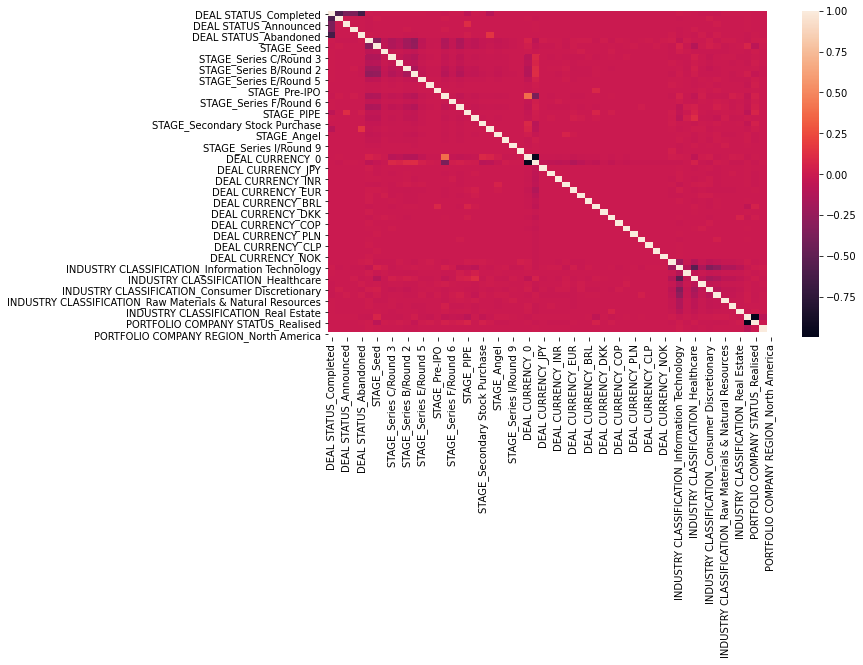

In [349]:
corrs = features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

In [334]:
# encoder=ce.OneHotEncoder(cols=['PORTFOLIO COMPANY STATUS', 'PORTFOLIO COMPANY REGION', 'PORTFOLIO COMPANY COUNTRY'],handle_unknown='return_nan',return_df=True,use_cat_names=True)



In [335]:
# features = encoder.fit_transform(features)
features.head()

DEAL STATUS_Completed  DEAL STATUS_Bidding  DEAL STATUS_Announced  \
0                    1.0                  0.0                    0.0   
1                    1.0                  0.0                    0.0   
2                    1.0                  0.0                    0.0   
3                    1.0                  0.0                    0.0   
4                    1.0                  0.0                    0.0   

   DEAL STATUS_Rejected  DEAL STATUS_Abandoned  STAGE_Unspecified Round  \
0                   0.0                    0.0                      1.0   
1                   0.0                    0.0                      1.0   
2                   0.0                    0.0                      0.0   
3                   0.0                    0.0                      1.0   
4                   0.0                    0.0                      0.0   

   STAGE_Seed  STAGE_Growth Capital/Expansion  STAGE_Series C/Round 3  \
0         0.0                             0.0                     0.0   
1         0.0                             0.0                     0.0   
2         1.0                             0.0                     0.0   
3         0.0                             0.0                     0.0   
4         0.0                             1.0                     0.0   

   STAGE_Series D/Round 4  ...  INDUSTRY CLASSIFICATION_Business Services  \
0                     0.0  ...                                        0.0   
1                     0.0  ...                                        0.0   
2                     0.0  ...                                        0.0   
3                     0.0  ...                                        0.0   
4                     0.0  ...                                        0.0   

   INDUSTRY CLASSIFICATION_Consumer Discretionary  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   INDUSTRY CLASSIFICATION_Financial & Insurance Services  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   INDUSTRY CLASSIFICATION_Raw Materials & Natural Resources  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   INDUSTRY CLASSIFICATION_Telecoms & Media  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   INDUSTRY CLASSIFICATION_Real Estate  PORTFOLIO COMPANY STATUS_Active  \
0                                  0.0                              1.0   
1                                  0.0                              1.0   
2                                  0.0                              1.0   
3                                  0.0                              1.0   
4                                  0.0                              1.0   

   PORTFOLIO COMPANY STATUS_Realised  PORTFOLIO COMPANY STATUS_0  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   

In [336]:
X = np.array(features)
y = np.array(target)

In [337]:
X.shape

(19017, 59)

In [338]:
y.shape

(19017,)

In [339]:
X_train

array([['US', 1.0, 0.0, ..., 'Active', 'North America',
        'Education/Training'],
       ['US', 1.0, 0.0, ..., 'Realised', 'North America',
        'Financial Services'],
       ['US', 1.0, 0.0, ..., 'Active', 'North America',
        'Consumer Products'],
       ...,
       ['US', 1.0, 0.0, ..., 'Active', 'North America',
        'Consumer Services'],
       ['US', 1.0, 0.0, ..., 'Active', 'North America',
        'Medical Devices & Equipment'],
       ['US', 1.0, 0.0, ..., 'Active', 'North America',
        'Consumer Products']], dtype=object)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [341]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[-1.56315302e+14 -1.56315302e+14 -1.56315302e+14  9.33517902e+14
 -1.56315302e+14  4.12689492e+14  4.12689492e+14  4.12689492e+14
  4.12689492e+14  4.12689492e+14  4.12689492e+14  4.12689492e+14
  4.12689492e+14  4.12689492e+14  4.12689492e+14  4.12689492e+14
  4.12689492e+14  4.12689492e+14  4.12689492e+14  4.12689492e+14
  4.12689492e+14  4.12689492e+14  4.12689492e+14  4.12689492e+14
  4.12689492e+14  4.12689492e+14  1.81681051e+14  1.81681051e+14
  1.81681051e+14  1.81681051e+14  1.81681051e+14  1.81681051e+14
  1.81681051e+14  1.81681051e+14  1.81681051e+14  1.81681051e+14
  1.81681051e+14  1.81681051e+14  1.81681051e+14  1.81681051e+14
  1.81681051e+14  1.81681051e+14  4.67059944e+13  1.81681051e+14
  1.81681051e+14  7.89188057e+14  7.89188057e+14  7.89188057e+14
  7.89188057e+14  7.89188057e+14  7.89188057e+14  7.89188057e+14
  7.89188057e+14  7.89188057e+14  7.89188057e+14 -3.05628139e+14
 -3.05628139e+14 -3.05628139e+14  0.00000000e+00]
-921615159440244.9


In [342]:
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

In [343]:
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

In-Sample R2:  0.08653226106675815
Out-Sample R2:  -4.427639047820078e+22

In-Sample MSE:  15167.219497664826
Out-Sample MSE:  6.292563324602311e+26

In-Sample MAE:  31.448965687241174
Out-Sample MAE:  608475674023.8292


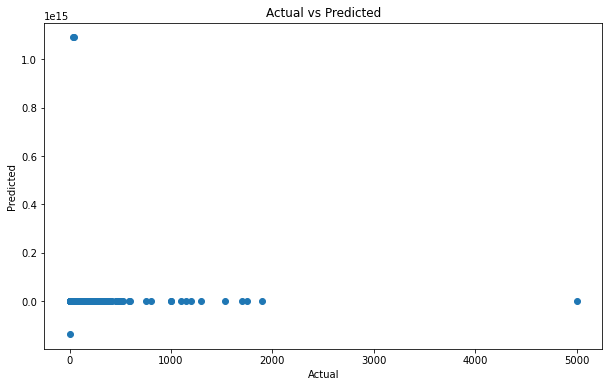

In [344]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()